<a href="https://colab.research.google.com/github/Lahasyakr/cs666student/blob/main/Final_CS638.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz
from sklearn.compose import ColumnTransformer #data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler #data preprocessing
from sklearn.impute import KNNImputer #handle missing values
from sklearn.model_selection import train_test_split #train/test dataset

from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score #evaluate model
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import roc_curve, auc, RocCurveDisplay,ConfusionMatrixDisplay

In [3]:
name = ['Class','age', 'sex','haemoglobin','platelets','WBC', 'serum-albumin','serum-globulin','total-protein','serum-cholesterol','serum-triglycerides']

In [5]:
data = pd.read_csv('burn_survival.data', names = name)

In [6]:
data.head()

,Class,age,sex,haemoglobin,platelets,WBC,serum-albumin,serum-globulin,total-protein,serum-cholesterol,serum-triglycerides
0,survivor,30,M,12.3,1.8,10000,2.8,2.6,5.20,120,121
1,survivor,36,F,12.0,2.2,9000,2.3,2.7,5.30,124,119
2,survivor,28,M,11.6,1.6,8600,2.6,3.0,4.80,123,120
3,survivor,19,F,10.0,1.2,5500,3.2,2.8,4.90,118,118
4,survivor,26,M,12.8,2.5,3600,2.6,2.5,4.85,122,150


## **DATA ANALYSIS**

<Axes: xlabel='sex', ylabel='count'>

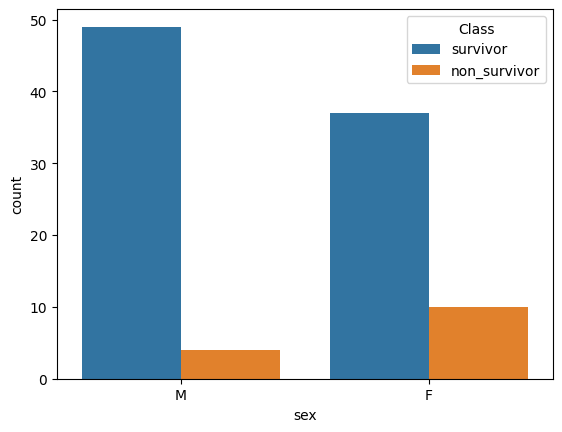

In [8]:
sns.countplot(data= data, x='sex', hue='Class')

<Axes: xlabel='Class', ylabel='age'>

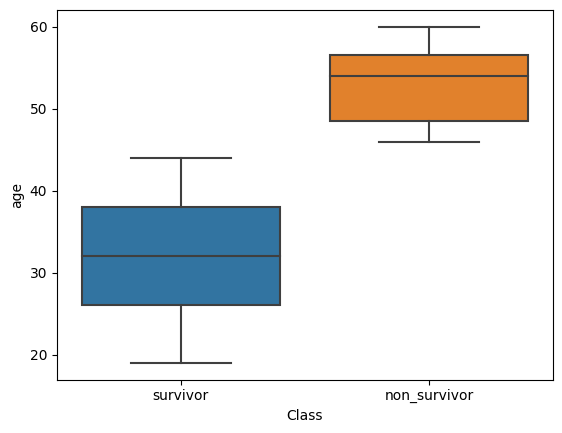

In [24]:
sns.boxplot(data=data, x='Class', y='age')

<Axes: xlabel='Class', ylabel='haemoglobin'>

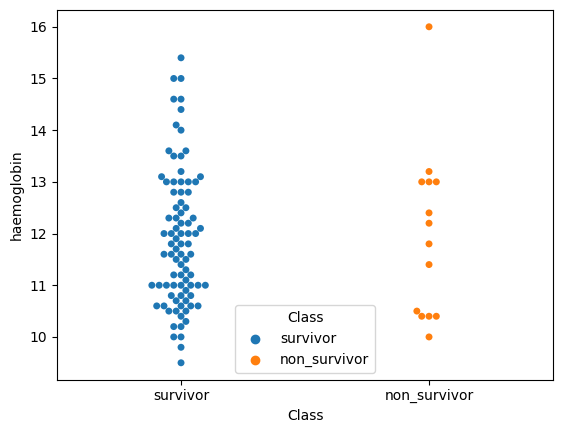

In [26]:
sns.swarmplot(data=data, x='Class', y='haemoglobin', hue='Class')

<Axes: xlabel='Class', ylabel='WBC'>

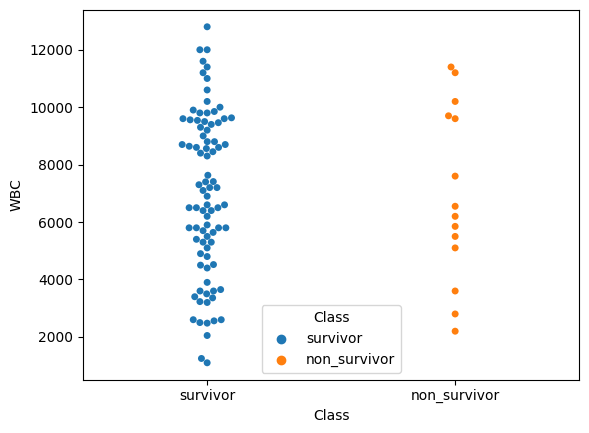

In [27]:
sns.swarmplot(data=data, x='Class', y='WBC', hue='Class')

<Axes: xlabel='Class', ylabel='platelets'>

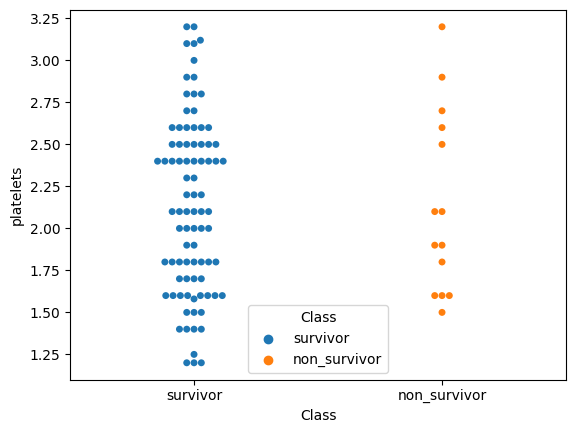

In [18]:
sns.swarmplot(data=data, x='Class', y='platelets', hue='Class')

<Axes: xlabel='Class', ylabel='serum-globulin'>

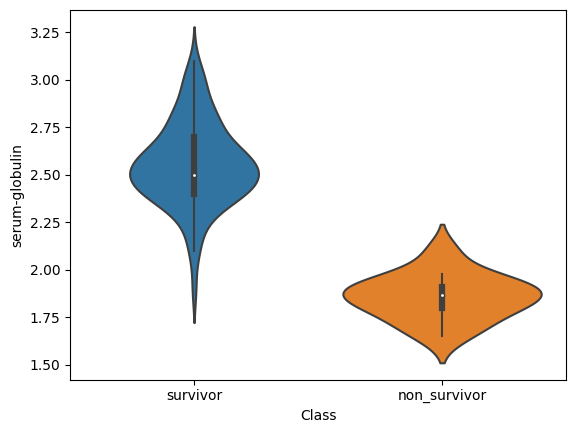

In [25]:
sns.violinplot(data=data, x='Class', y='serum-globulin')

<Axes: xlabel='Class', ylabel='total-protein'>

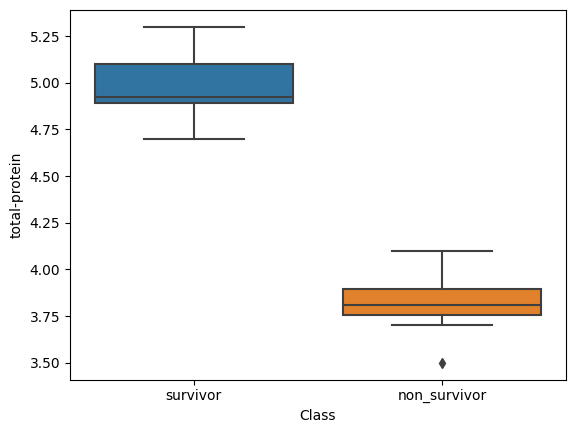

In [31]:
sns.boxplot(data=data, x='Class', y='total-protein')

<Axes: xlabel='serum-cholesterol', ylabel='serum-albumin'>

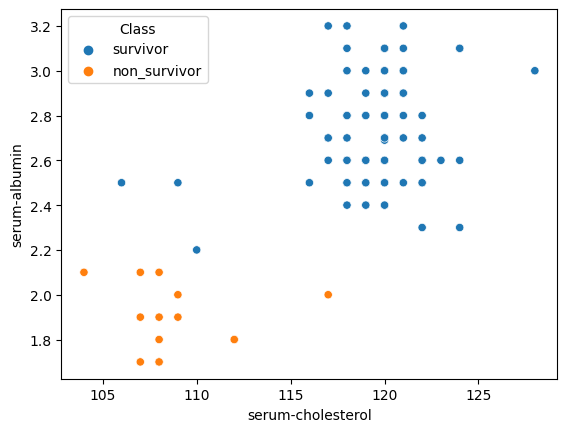

In [20]:
sns.scatterplot(data=data, x='serum-cholesterol', y='serum-albumin', hue='Class')

<Axes: xlabel='Class', ylabel='serum-triglycerides'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


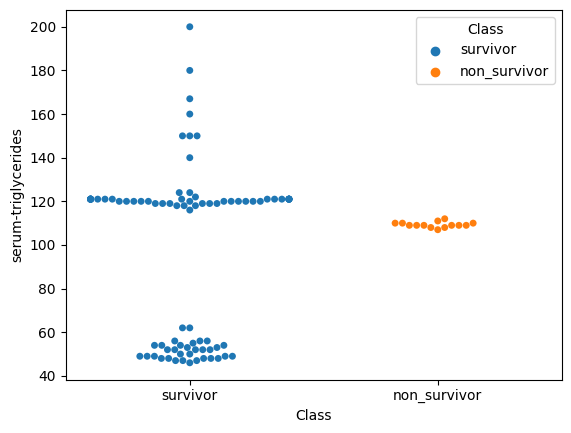

In [34]:
sns.swarmplot(data=data, x='Class', y='serum-triglycerides', hue='Class')

Based on the above data analysis, we will be considering foloowing features for our model -


1.  age
2.  sex
3. serum-albumin
4. serum-globulin
5. total-protein
6. serum-cholesterol
7. serum-triglycerides



# **DATA PREPROCESSING**

In [35]:
from sklearn import preprocessing
data =data.apply(preprocessing.LabelEncoder().fit_transform)
data.head()

,Class,age,sex,haemoglobin,platelets,WBC,serum-albumin,serum-globulin,total-protein,serum-cholesterol,serum-triglycerides
0,1,11,1,24,7,66,12,19,25,11,21
1,1,17,0,21,11,52,6,21,26,15,19
2,1,9,1,17,5,48,9,24,11,14,20
3,1,0,0,2,0,25,16,22,15,9,18
4,1,7,1,28,14,14,9,16,12,13,25


<Axes: >

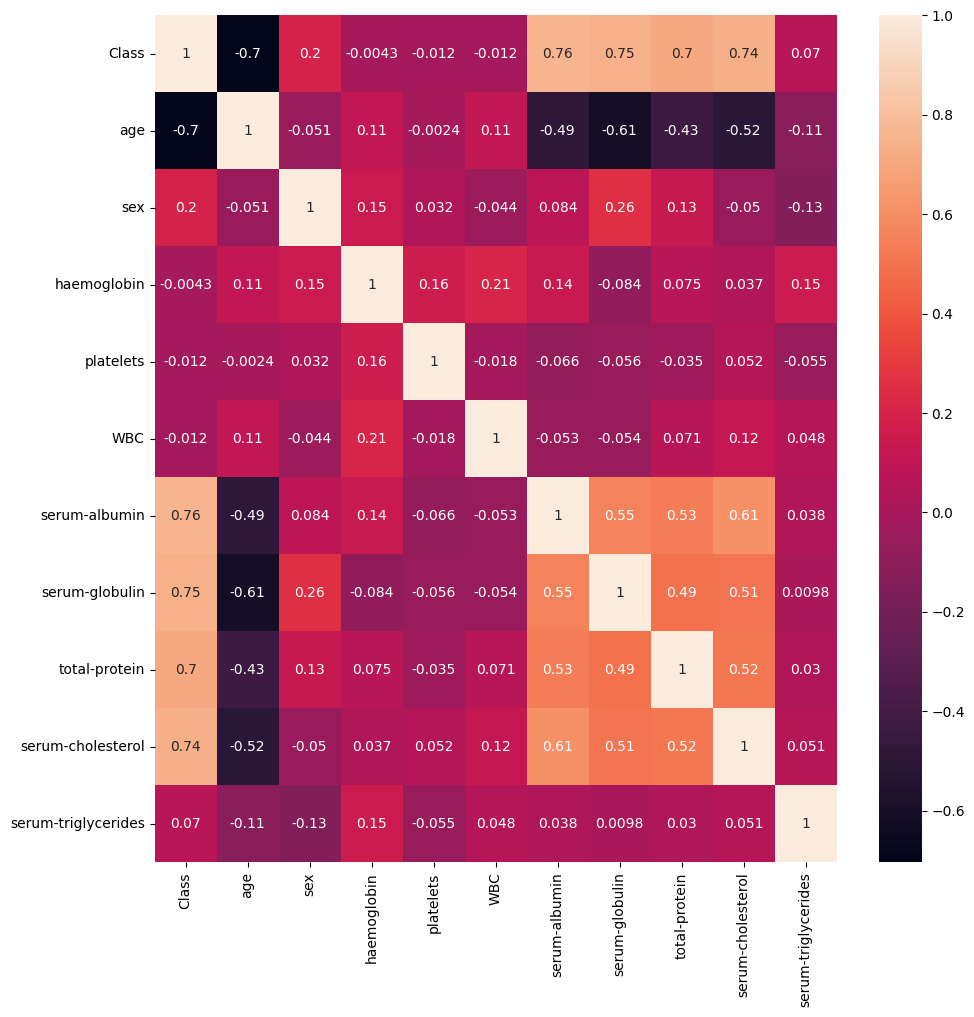

In [36]:
fig = plt.figure(figsize=(11,11))
sns.heatmap(data.corr(),annot=True)

In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

In [246]:
X = data[['age', 'sex', 'serum-albumin','serum-globulin','total-protein','serum-cholesterol','serum-triglycerides']]
y = data['Class']


In [260]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.5, random_state = 50)
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test,test_size = 0.45, random_state = 50)

# **Handling data imbalance**
using Synthetic Minority Oversampling Technique, or SMOTE
applying SMOTE only on the training set and the test and validation set are unchanged

In [261]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("x val: ",x_val.shape)

print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
print("y val: ",y_val.shape)

x train:  (50, 7)
x test:  (27, 7)
x val:  (23, 7)
y train:  (50,)
y test:  (27,)
y val:  (23,)


# **LOGISTIC REGRESSION**

In [277]:
# Defining logistic regression
survival_classifier = LogisticRegression(C=0.01)

In [278]:
survival_classifier.fit(x_train, y_train)
y_pred = survival_classifier.predict(x_test)
y_pred_val = survival_classifier.predict(x_val)

In [279]:
#evaluating the model
print(classification_report(y_test, y_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Val Accuracy: ", accuracy_score(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        24

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

Test Accuracy:  1.0
Val Accuracy:  1.0


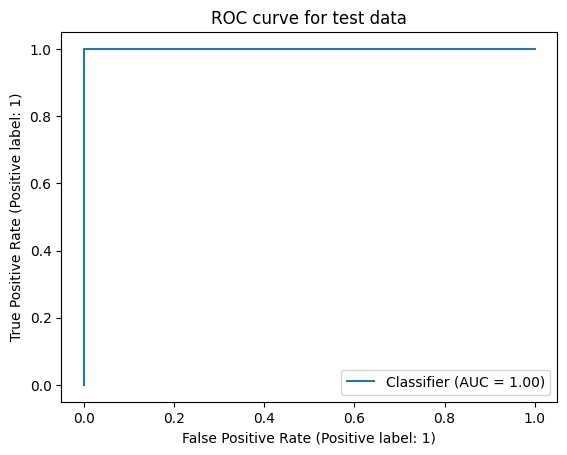

In [280]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title('ROC curve for test data')
plt.show()

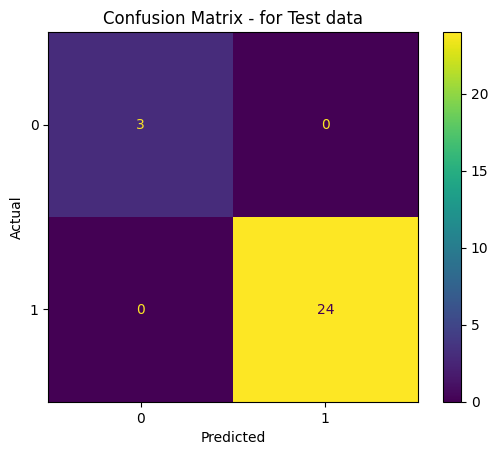

In [281]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - for Test data')
plt.show()

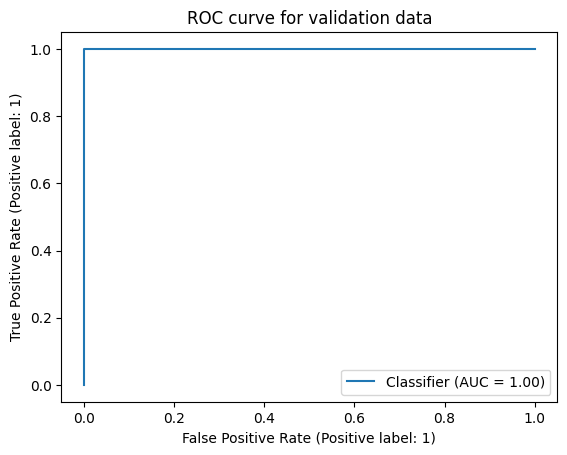

In [282]:
RocCurveDisplay.from_predictions(y_val, y_pred_val)
plt.title('ROC curve for validation data')
plt.show()

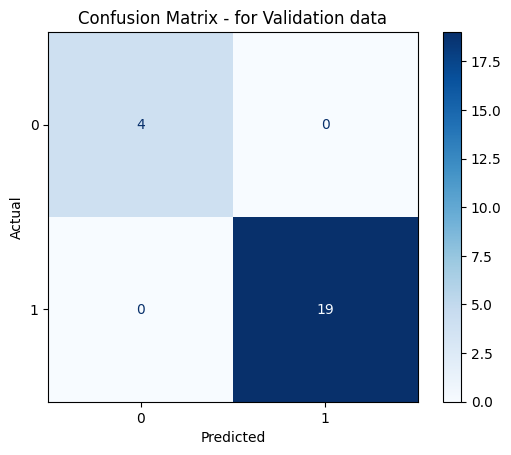

In [290]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_val,y_pred_val, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - for Validation data')
plt.show()

['10000.0', '1000.0', '100.0', '10.0', '1.0', '0.1', '0.01', '0.001']


<ipython-input-284-54ac824fbebe>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lambda_)


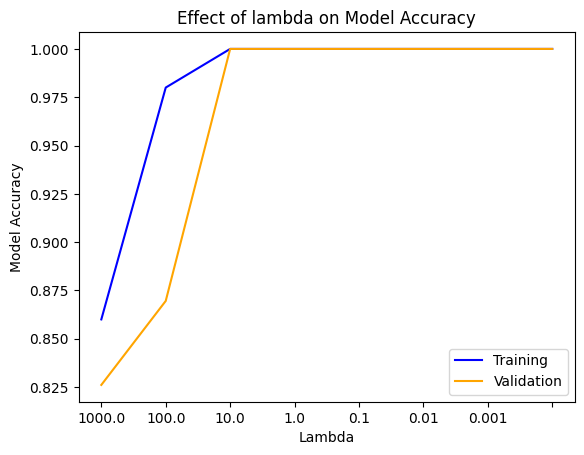

In [284]:
C_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
# C_values= np.linspace(0.01,10,100)
lambda_ = [str(1/i) for i in C_values]
print(lambda_)
train_acc, val_acc, test_acc = [], [], []

for c in C_values:
    # where lambda = 1/c
    r_c = LogisticRegression(C = c, random_state = 1)
    r_c.fit(x_train,y_train)


    y_pred_train = r_c.predict(x_train)
    y_pred_valid = r_c.predict(x_val)
    y_pred_test = r_c.predict(x_test)

    # accuracy
    train_acc.append(accuracy_score(y_train, y_pred_train))
    val_acc.append(accuracy_score(y_val, y_pred_valid))
    test_acc.append(accuracy_score(y_test, y_pred_test))


fig, ax = plt.subplots()
fig.canvas.draw()
plt.xlabel("Lambda")
plt.ylabel("Model Accuracy")
plt.plot(np.array(train_acc), color='blue', label='Training')
plt.plot(np.array(val_acc), color='orange', label='Validation')


plt.legend()
ax.set_xticklabels(lambda_)
plt.title('Effect of lambda on Model Accuracy')
plt.show()

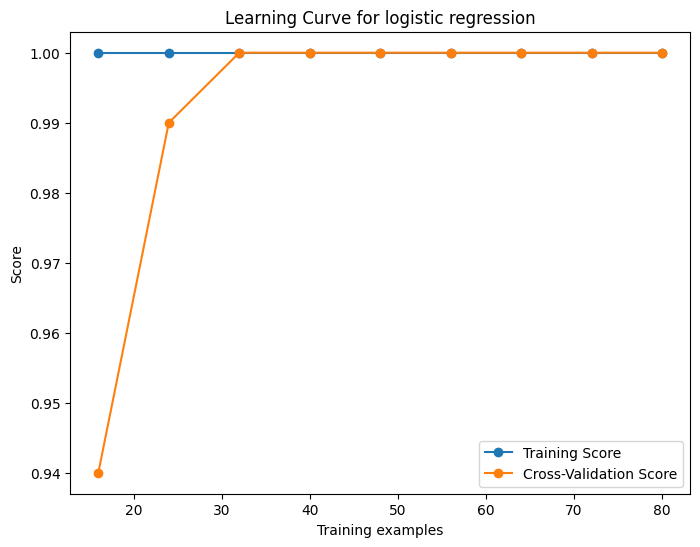

In [295]:
train_sizes, train_scores, test_scores = learning_curve(survival_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for logistic regression')
plt.legend(loc='best')
plt.show()

K-fold cross-validaiton for hypterparameter selection

In [317]:
grid_select={"C":[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}

search_cv = GridSearchCV(survival_classifier, param_grid=grid_select, cv=7, scoring='accuracy', verbose=True, n_jobs=-1)

best_clf = search_cv.fit(x_val, y_val)

Fitting 7 folds for each of 8 candidates, totalling 56 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=7.
  warnings.warn(


In [318]:
# Best hyperparameter
print("Best hpyerparameters :(best parameters) ",best_clf.best_params_)
print("accuracy :", best_clf.best_score_)

Best hpyerparameters :(best parameters)  {'C': 0.01}
accuracy : 1.0


# **Classification using SVM**

In [285]:
from sklearn.svm import SVC
from sklearn import svm

In [287]:
svm_model  = svm.SVC()
svm_model .fit(x_train, y_train)
pred_y = svm_model .predict(x_test)
pred_y_val = svm_model .predict(x_val)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        24

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [288]:
print('test_acc ',accuracy_score(y_test, pred_y))
print('val acc', accuracy_score(y_val, pred_y_val))

test_acc  1.0
val acc 1.0


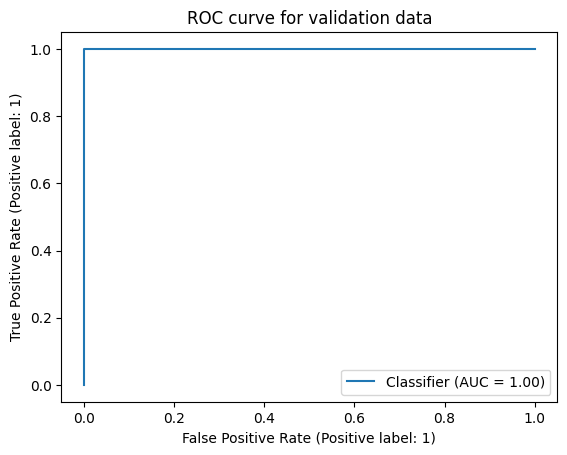

In [289]:
RocCurveDisplay.from_predictions(y_val, pred_y_val)
plt.title('ROC curve for validation data')
plt.show()

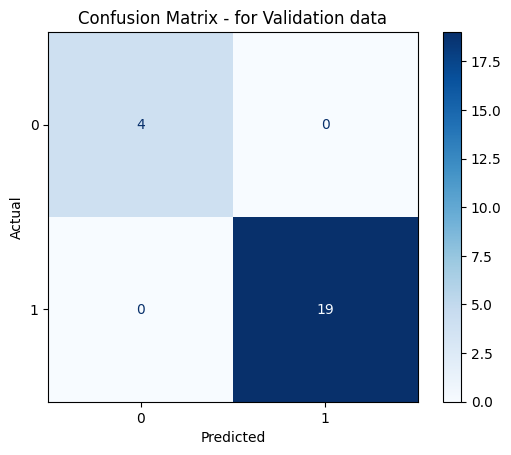

In [292]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_val,pred_y_val, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - for Validation data')
plt.show()

['1000.0', '100.0', '10.0', '1.0', '0.1', '0.01']


<ipython-input-293-d0b0141ce0e4>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lambda_) #


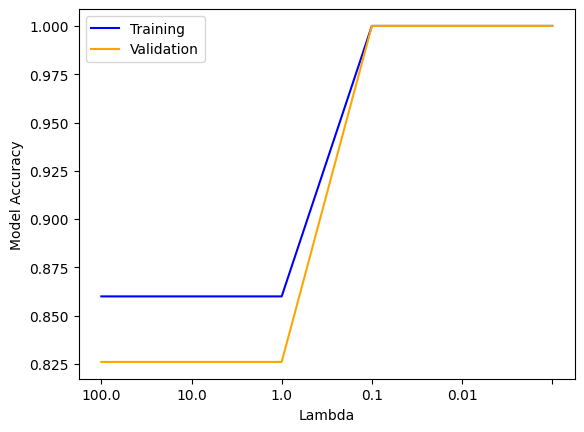

In [293]:
#Tuning Hyperparameters

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
# C_values= np.linspace(0.01,10,100)
lambda_ = [str(1/i) for i in C_values]
print(lambda_)
train_acc, val_acc, test_acc = [], [], []

for c in C_values:
    # where lambda = 1/c
    sclf = svm.SVC(C = c, random_state = 1)
    sclf.fit(x_train,y_train)


    y_pred_train = sclf.predict(x_train)
    y_pred_valid = sclf.predict(x_val)
    y_pred_test = sclf.predict(x_test)

    # accuracy
    train_acc.append(accuracy_score(y_train, y_pred_train))
    val_acc.append(accuracy_score(y_val, y_pred_valid))
    test_acc.append(accuracy_score(y_test, y_pred_test))


fig, ax = plt.subplots()
fig.canvas.draw()
plt.xlabel("Lambda")
plt.ylabel("Model Accuracy")
plt.plot(np.array(train_acc), color='blue', label='Training')
plt.plot(np.array(val_acc), color='orange', label='Validation')


plt.legend()
ax.set_xticklabels(lambda_) #
plt.show()

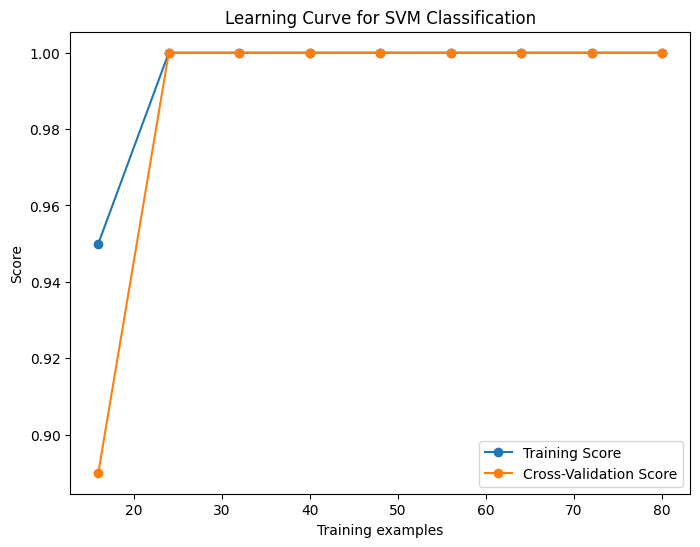

In [294]:
train_sizes, train_scores, test_scores = learning_curve(svm_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for SVM Classification')
plt.legend(loc='best')
plt.show()

In [315]:
grid_select={"C":[0.001, 0.01, 0.1, 1, 10, 100], 'degree':[1,2,3, 4, 5, 6]}
svm_clf = svm.SVC()
svm_cv = GridSearchCV(svm_clf, param_grid=grid_select, cv=5, scoring='accuracy', verbose=True, n_jobs=-1)

fine_classifier = svm_cv.fit(x_val, y_val)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [316]:
# Best hyperparameter
print("Best hpyerparameters :(best parameters) ",fine_classifier.best_params_)
print("accuracy :",fine_classifier.best_score_)

Best hpyerparameters :(best parameters)  {'C': 1, 'degree': 1}
accuracy : 1.0


# **Classification usingNeural Network**

In [304]:
nn_clf  = MLPClassifier()
nn_clf.fit(x_train, y_train)
pred_nn_clf = nn_clf.predict(x_test)

In [298]:
print(classification_report(y_test, pred_nn_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        24

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [305]:
print('Validation acuracy',accuracy_score(y_val, nn_clf.predict(x_val)))
print('test acuracy',accuracy_score(y_test, pred_nn_clf))

Validation acuracy 1.0
test acuracy 1.0


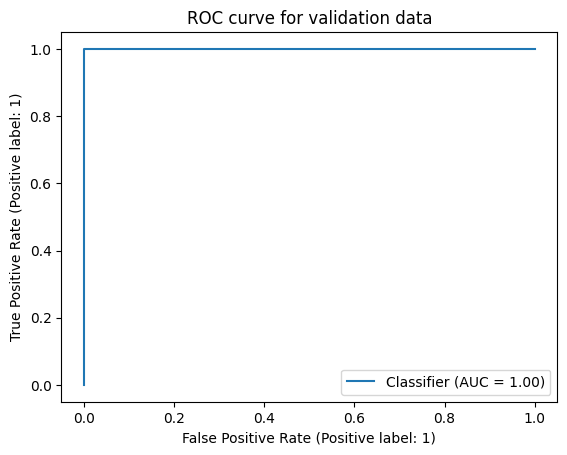

In [306]:
RocCurveDisplay.from_predictions(y_val, nn_clf.predict(x_val))
plt.title('ROC curve for validation data')
plt.show()

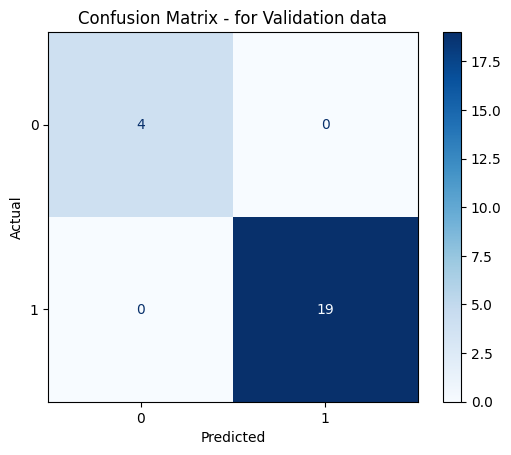

In [307]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_val, nn_clf.predict(x_val), cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - for Validation data')
plt.show()

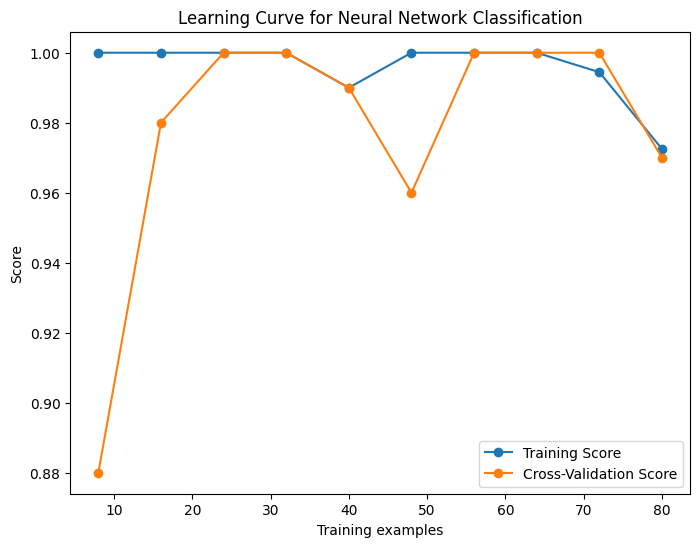

In [308]:
train_sizes, train_scores, test_scores = learning_curve(nn_clf, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for Neural Network Classification')
plt.legend(loc='best')
plt.show()

In [313]:
parameters_ = {
    'hidden_layer_sizes': [(10,30,10),(10,20,10),(20,15,10),(10,10,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.01, 0.1],
    'learning_rate': ['constant','adaptive'],
}
#grid search in validation data
classifier_ = GridSearchCV(nn_clf, parameters_, n_jobs=-1, cv=5, verbose=True)
best = classifier_.fit(x_val, y_val)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [314]:
print('Best Parameters:\n', classifier_.best_params_)
print("accuracy :", best.best_score_)

Best Parameters:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
accuracy : 1.0


# **ROC Curve comparision**

The best params form grid search are considered here

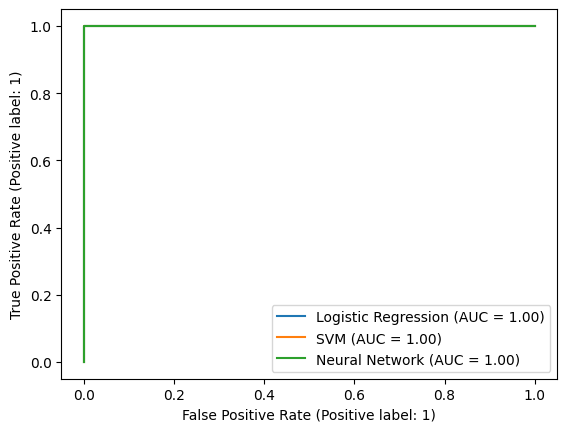

In [324]:
svm_clf = svm.SVC(C=1,degree=1)
lr_clf = LogisticRegression(C=0.01)

nn_clf = MLPClassifier(hidden_layer_sizes=(10, 30, 10),alpha=0.0001,activation='tanh',learning_rate='constant',solver='sgd', max_iter=1000)
lr_clf.fit(x_train, y_train)
svm_clf.fit(x_train, y_train)
nn_clf.fit(x_train, y_train)

display = RocCurveDisplay.from_estimator(lr_clf, x_test,y_test,name="Logistic Regression")
RocCurveDisplay.from_estimator(svm_clf,x_test,y_test, ax= display.ax_, name="SVM");
RocCurveDisplay.from_estimator(nn_clf,x_test,y_test, ax= display.ax_,name="Neural Network");

